# A Larger Dataset from Scratch

Created by Dr. Jie Tao, ver. 0.1

## What you need to know in this part
We are putting things together we learned in this course, and some other courses together. Specifically, these knowledge elements include:
- Pandas 
    - DataFrame Operations
    - Plotting
- Markdown
    - Express your analytical ideas
    - Explain your analysis
- Basic Descriptive Analysis from QA500
- Analytics Pipeline from BA500

## What you can do in this part
After completing this part, you should be able to:
- Create and lay out a new Jupyter Notebook
- Collaborate with your peers using Git/Github
- Use Pandas to load and manipulate a large dataset
- Use Dataframe operations to analyze the data
- Use Pandas plotting to plot key statistics

## Step 0: Work with Your Final Group 
Consider this part as the final tryout for the final projects, in a __much smaller__ scale. You should work with the same group of people as the final project.

## Step 1: Study Your Data
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Here is a data dictionary you can use to understand your data, which is available [here](https://www.kaggle.com/c/titanic/data) as well.

| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| survival | _Passenger survived or not_ | __0 = No, 1 = Yes__ |
| pclass | _Ticket Class_ | __1 = 1st, 2 = 2nd, 3 = 3rd__ |
| name | _Name of the passenger_ | ... | 
| sex | _Gender of the passenger_ | __male, female__ |
| age | _Age in Years_ | ... |
| sibsp | _# of siblings / spouses aboard the Titanic_ | ... |
| parch | _# of parents / children aboard the Titanic_ | ... |
| ticket | _Ticket number_ | ... |
| fare | _Passenger fare paid_ | ... |
| cabin | _Cabin number_ | ... |
| embarked | _Port of Embarkation_ | __C = Cherbourg, Q = Queenstown, S = Southampton__ |

There are some additional notes for these variables that maybe helpful:

- __pclass__: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- __age__: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- __sibsp__: This feature defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- __parch__: This feature defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
# likely survived sibling or parents 

### YOUR TURN HERE
Write a short paragraph here to explain how do you plan to use the data. Specifically, you need to come up with at least 2 _interesting_ __analytical questions__. Also, include a _third_ analytical question for __next steps__ (things you can not do now but plan to do in the future, maybe due to the limitations of time/data/technique). Do not forget mention __how other people should care about your analysis__.

Please do not use these questions directly, come up with something new.

__NOTE:__ you should follow the same structure for your final project.

__Your Analytical Questions below: __


# Analytical Assigment 

The goal was to find out about the chances of survival of those who travelled alone and with family based on all other variables (i.e. sex, gender, class etc). Moreover, to find out why so many more man died compared to women. 

Here are some example questions:
1. Do passangers who travel alone have a bigger chance of survival?
2. What is the demographics of those who travel alone (age,gender)?
3. Whats the fare compared to those traveling in groups?

Secondly, the `titanic.csv` file contains all the data you need to use. Let's first load the data in. The DataFrame holding the data should be named as `source_data`.

In [42]:
# DO NOT CHANGE THIS CODE BLOCK
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Load the Data
Hint - you may want to set `PassengerId` as the index of the DataFrame, you can do above by using the `index_col=` argument in `pd.read_csv`.

In [43]:
## Write your code to load the data
source_data = pd.read_csv('titanic.csv',index_col="PassengerId")

### Take the first look at your data

After loading your data, it is most important to see if the data is loaded as expected, you should at least look at _a few rows_ in `source_data`.

In [44]:
## write your code here
source_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You should also check how much data are your playing with, in terms of how many instances (rows) and features (columns).

In [45]:
## write your code here
source_data.shape

(891, 11)

### Determining how much data is missing
The next step is to check how much data is missing - maybe show them in ratio?

In [46]:
## Write your code here
source_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

If a column/feature contains more than __50%__ missing, we will drop it in this analysis.

In [47]:
## write your code here
source_data.isna().mean().round(4) * 100
source_data = source_data.drop(columns='Cabin',axis=1)

If a column contains less that __50%__ missing, you shoud consider impute it.
- If the feature is __continuous__, you should consider using the _mean/median_;
- If it is __categorical__, you shoud consider using the _mode_.

Create new columns for imputed features. For instance, if the original feature is named `x`, your imputed feature should be `x_imputed`.

In [48]:
## write your code here
source_data['Age_imputed'] = source_data["Age"].fillna(source_data["Age"].mean())
source_data['Embarked_imputed'] = source_data["Embarked"].fillna(source_data["Embarked"].mode()[0])
source_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.000000,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.000000,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.000000,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.000000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,27.000000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,19.000000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,29.699118,S


### Check your data types
You should always check the data types after loading the data. First, check the data types (you can use `.dtypes` or `.info()`.

In [49]:
## Write your code here
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived            891 non-null int64
Pclass              891 non-null int64
Name                891 non-null object
Sex                 891 non-null object
Age                 714 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Ticket              891 non-null object
Fare                891 non-null float64
Embarked            889 non-null object
Age_imputed         891 non-null float64
Embarked_imputed    891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


If you see anything not correct above, you should fix it below. Otherwise, write a comment to yourself stating __all data types are correct__.

In [50]:
## Write your code here
source_data.dtypes

Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Embarked             object
Age_imputed         float64
Embarked_imputed     object
dtype: object

## Step 2: Descriptive Stats

No matter what analytical questions you try to develop/answer, there are some basic statistical questions you need to answer. 

These descriptive statistical analysis can help you gain more insights about your data, to further/tweak your main analytical questions.

### Overall descriptive Stats

For any DataFrame, we should consider look at the generic descriptive statistics, such as _mean_, _median_, _# of unique values_, _standard deviation_, ...

`Pandas` provides a method for that.

In [51]:
## Write your code here
source_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_imputed
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


### How many survived?

First thing you may want to know is how many have survived, maybe through a bar chart comparison?

In [52]:
source_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,S


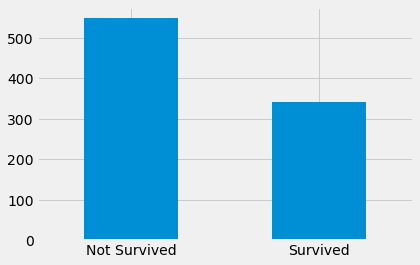

In [53]:
## Write your code here
survived_not = source_data['Survived'].value_counts()
survived_not.index = ['Not Survived','Survived']
survived_not.plot(kind="bar",rot=0)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

    - That most of the passengers did not survive the Titanic journey (500+). 
    - Little more than 300 passengers survived.

### How many male vs. female?
Gender (`sex`) is another important feature to group your instances. You may want to check the distribution as well.

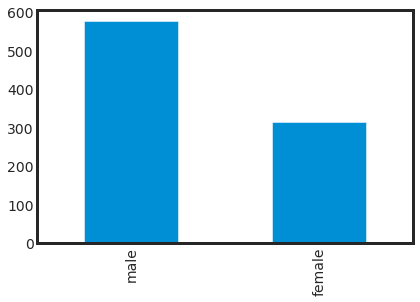

In [119]:
## Write your code here
source_data['Sex'].value_counts().plot(kind='bar')

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

    - Most of the passengers are males. Total number of passengers is 898, theres almost 600 males and about 300 female
    passengers.

### Different classes
Look at the distribution of different classes are also important.

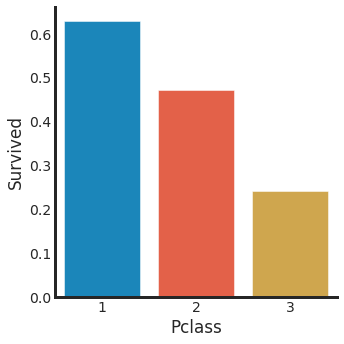

In [109]:
## Write your code here
import seaborn as sns
sns.catplot(x="Pclass",y='Survived',data=source_data,kind='bar',ci=None)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

    - Those who were in first class had the highest survival rate. 
    - Then it was the 2nd class and last 3rd class passenger tickets. 

### How is age distributed?

Looking at the age distribution of the passengers may also be useful.

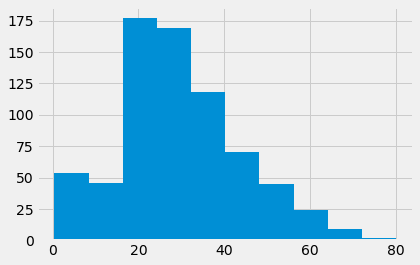

In [56]:
## Write your code here
source_data['Age'].hist()

### Answer the question:

__What can you learn from above figure?__ Write your answer below:
    - The majority of passengers is between ages 20 - 40 
    - There were about 100 passengers below age 20 on board
    - There is only a few passengers above age 60. Max age group is 70-80. 

### How is fare distributed?

Looking at the fare distribution of the passengers may also be useful.

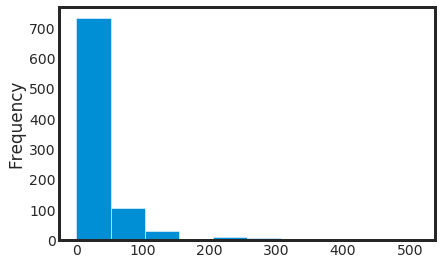

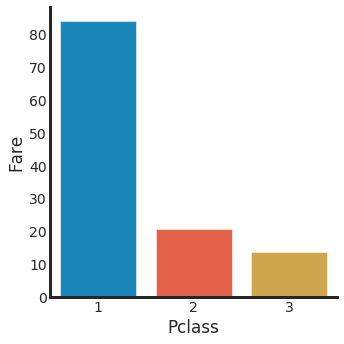

In [122]:
## Write your code here
source_data['Fare'].plot(kind='hist')
sns.catplot(x='Pclass',y='Fare',data=source_data,kind='bar',ci=None)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:
    - most fares (700) cost $50 or lower. About a hundred passengers payed between 50-100, and only handfull 
    payed between 100-150. Lastly, few payed between $200-$250. 
   - Obviously the tickets are priced in class order. 1st class ticket is much more expensive than the 2nd class
   compared to 3rd class ticket (more than half). 

You should ckeck other faetures if you decide to use them in your analysis.

## Step 3: Feature Transformation/Creation

In your analysis, you may need to create some addtional features/columns to further support it. 

Here, we are going to create a few features.

### Creating age group

Grouping age into a categorical feature is always a good strategy to deal with your data. In this analysis, we treat the age grouping use the following logic:

```python
if age < 21:
    'child'
elif age > 60:
    'elder'
else:
    'adult'
```

You should call the new column as `Age_group`.

In [58]:
# a complex function
def my_age(x):
    if x <21:
        return 'child'
    if x > 60:
        return 'elder'
    else:
        return 'adult'

In [72]:
## write your code here
source_data["Age_group"] = source_data['Age'].apply(lambda x: my_age(x))
source_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed,Age_group,travel_alone
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.000000,S,adult,family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.000000,C,adult,family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.000000,S,adult,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.000000,S,adult,family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.000000,S,adult,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,27.000000,S,adult,alone
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,19.000000,S,child,alone
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,29.699118,S,adult,family


### Create family and travel_alone

In this dataset, we have two features modeling _family_: `sibsp` and `parch`. Maybe in the analysis we only care about if the passenger is traveling alone or not.

The logic is as following:
1. we are going to combine `sibsp` and `parch` as a new column `family` - just adding them up;
2. create a new column `travel_alone` with the following logic:
```python 
if family == 0:
    'alone'
else:
    'family'
```
Don't forget to test if the calculation is correct.

In [73]:
## write your code here
# a complex function
def my_family(x):
    if x == 0:
        return 'alone'
    else:
        return 'family'
source_data["travel_alone"] = source_data['SibSp'].apply(lambda x: my_family(x))
source_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed,Age_group,travel_alone
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.000000,S,adult,family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.000000,C,adult,family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.000000,S,adult,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.000000,S,adult,family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.000000,S,adult,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,27.000000,S,adult,alone
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,19.000000,S,child,alone
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,29.699118,S,adult,family


You should create additional features if needed.

## Step 4: Answer Your Analytical Question

Since we have gained enough understanding of the dataset, now we can move forward toward the analytical questions you defined earlier. _Do not hesitate to change your analytical question if needed._

__You should break down this step based on your analytical questions. __

Below is some example I try to answer my example analytical questions.

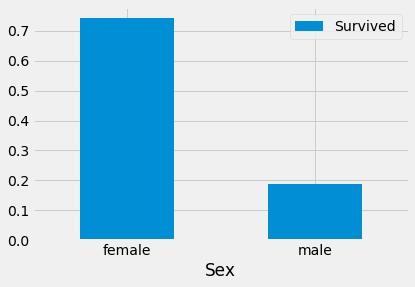

In [74]:
# sex vs. survived
source_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind='bar', rot = 0)

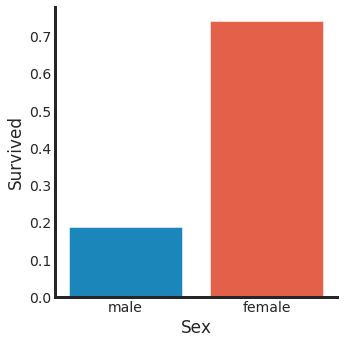

In [128]:
# sex vs. survived
sns.catplot(x="Sex",y='Survived',data=source_data,kind='bar',ci=None)

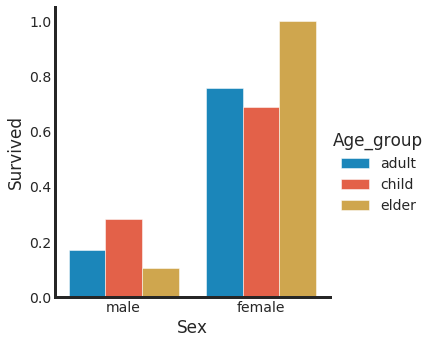

In [133]:
# Female survival rate is impressive especially for the elders
# comparing that to old man who appearently do not count at all
# similarly female children had a much higher survival rate #strange #feminism #lol
sns.catplot(x="Sex",y='Survived',hue='Age_group',data=source_data,kind='bar',ci=None)

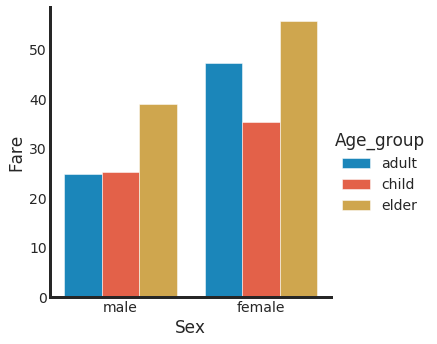

In [135]:
sns.catplot(x="Sex",y='Fare',hue='Age_group',data=source_data,kind='bar',ci=None)

### What can be learned - This is required for all your analytical questions

Based on above visualization, it is clear that the _survival rate_ of _female_ passengers are much higher (>70%). 

Based on the lower visualization, it is clear that in terms of the absolute number, female passengers survived more than male ones, despite the larger number of male passengers on the Titanic.

These findings possibly suggest that the passengers on the Titanic are very __chivalrous__.

### Start Your Own Analysis

Now you can start your own analysis below.

# Distribution
    - Goal: more clear analysis of distribution of passengers 

## Distribution of passenger classes
    - most of the passengers are in the 3rd class (55.1%), 24.2% in first class, and 20.7% in 2nd class.

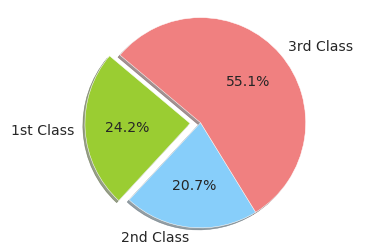

In [108]:
# Data to plot
labels = '1st Class', '2nd Class', '3rd Class'
sizes = [216/891, 184/891, 491/891]
colors = ['yellowgreen','lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Distribution of Age Groups
    - about 3/4 were adults, then 20.2% were children and 2.5% elders. 

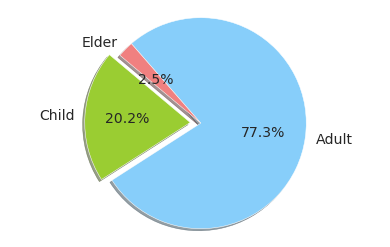

In [150]:
# Data to plot
labels = 'Child', 'Adult', 'Elder'
sizes = [180/891, 689/891, 22/891]
colors = ['yellowgreen','lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Sex Distribution
    - There were mostly males on board (64.8% vs. 35.2%)

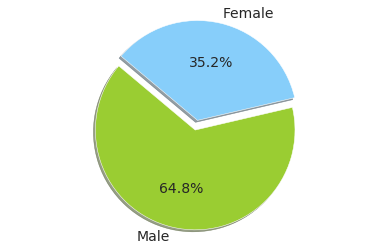

In [153]:
# Data to plot
labels = 'Male', 'Female'
sizes = [577/891, 314/891]
colors = ['yellowgreen','lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Pay to survive
    - those who did not surive whether male or female payed about the same
    - survival rate was much higher if you payed more 
        - women payed more to survive on average and more of them survived

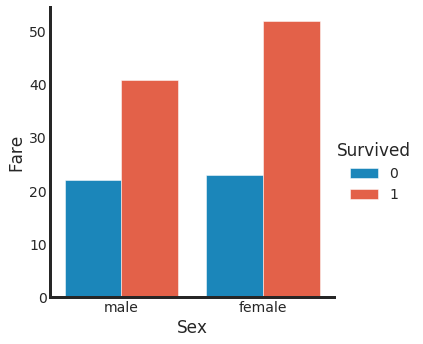

In [139]:
sns.catplot(x="Sex",y='Fare',hue='Survived',data=source_data,kind='bar',ci=None)

## Loners vs Family survival rate based on sex
    - Female's who traveled alone had the highest survival rate, than a bit behind are female's with families.
    - Female survival rate is much higher. Males had a better chance of survival if they traveled with a family.
    - However, we know that women paid more on average to have a higher survival rate

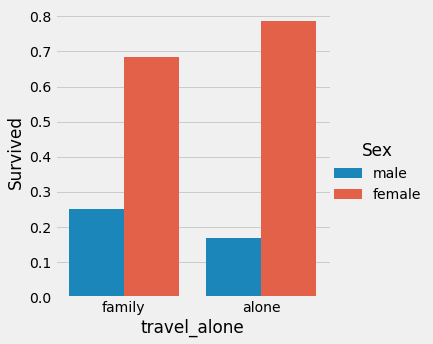

In [79]:
#source_data.groupby('travel_alone')['Sex'].mean().plot(kind='bar')
sns.catplot(x="travel_alone",y='Survived',hue='Sex',data=source_data,kind='bar',ci=None)

## Loners vs Family survival rate based on class
    - Family had the highest survival rate in every class. The biggest difference for that can be seen
    when comparing 1st and 2nd class. 3rd class is almost the same. 

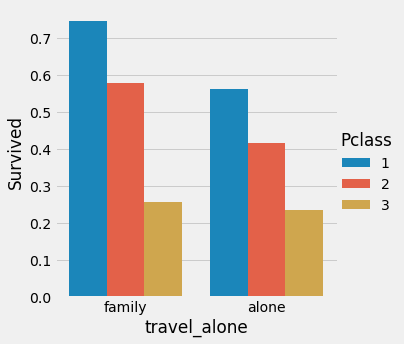

In [80]:
sns.catplot(x="travel_alone",y='Survived',hue='Pclass',data=source_data,kind='bar',ci=None)

## Loners vs Family survival rate based on Age Group
    - Elders had the highest chance of survival if they travelled with a family.
    - Children had almost the same rate no matter they traveling status. 
    - Adults had a better chance if they travelled with a family 

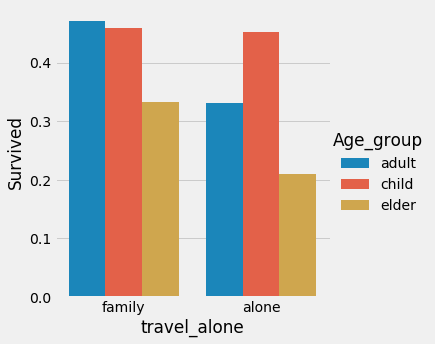

In [81]:
sns.catplot(x="travel_alone",y='Survived',hue='Age_group',data=source_data,kind='bar',ci=None)

## Loners vs Family, Fare based on Age Group
    - Elders who travelled with families payed much more than anyone else
        - perhaps they are the ones who payed for the families 
    - Everyone else payed about $20-$45

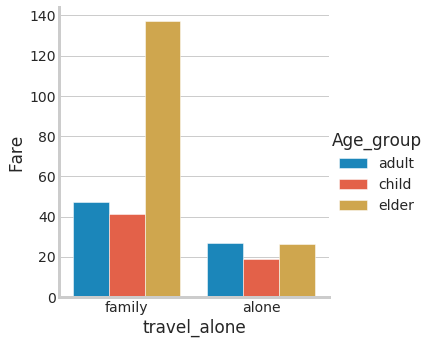

In [102]:
sns.catplot(x="travel_alone",y='Fare',hue='Age_group',data=source_data,kind='bar',ci=None)
sns.set_style('white')

### What can you learn from your analysis, in response toward your analytical question?

1. Most of the passengers are in the 3rd class (55.1%), 24.2% in first class, and 20.7% in 2nd class.
  - There were mostly males on board (64.8% vs. 35.2%)
  - about 3/4 were adults, then 20.2% were children and 2.5% elders. 
  
2. Female survival rate is impressive especially for the elders
    - comparing that to old man who appearently do not count at all
    - similarly female children had a much higher survival rate

3. Elders who travelled with families payed much more than anyone else
    - Perhaps they are the ones who payed for the families 
    - Everyone else payed about $20-$45 dollars
    
    
4. Elders had the highest chance of survival if they travelled with a family.
    - Children had almost the same rate no matter they traveling status. 
    - Adults had a better chance if they travelled with a family     
    
    
5. Family had the highest survival rate in every class. The biggest difference for that can be seen
    when comparing 1st and 2nd class. 3rd class is almost the same. 
    
6. those who did not surive whether male or female payed about the same
    - survival rate was much higher if you payed more 
        - women payed more to survive on average and more of them survived
    
    
7. Female's who traveled alone had the highest survival rate, than a bit behind are female's with families.
    - Female survival rate is much higher
    - Males had a better chance of survival if they traveled with a family.
    - However, we know that women paid more on average to have a higher survival rate

## Step 5: Next Steps and Wrap Up

In this section, you should discuss the next steps of the analysis. The next steps should be very relevant to the dataset (and your analytical questions), but might not be feasible because of the time/data/technique constraints.

### An Example Next Step

Based on my analytical questions, a natural next step is to analyze how can we use these features (including `Sex`, `Age_group`, ...) to __predict__ whether a passenger would survive or not. This would be the best extension of the analysis I have done so far. However, due to the data limitation (missing a _testing_ dataset to evaluate the predictive model(s)), and the limitations of the predictive modeling techniques (which I will learn in BA 545 next semester), they are not feasible at this point

### Next Steps

Provide your next steps here.

To wrap up, you should provide a few things, including __lessons learned__ and __technical challenges__. These parts are _optional_ in this analysis, but are __required__ in your final project.

- __lessons learned__: these are the generic lessons you have learned in the analysis, such as how to write proper python code (for different analytical purposes), how to write up your analytical results, etc.
- __technocal challenges__: during your analysis, you must have encountered and overcame some technical challenges, such as questions in writing code/handling errors, ...

Writing these two parts would help you further your understanding toward data analysis.

### Wrapping Up

Good job!

In this part, you have completed some _descriptive analyses_ using a famous dataset from scratch. This is a __preview__ of your final project, and you should consider using this notebook as a _template_ for your final project analysis.